In [1]:
import numpy as np # math
import pandas as pd # data 
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plot heatmap ans such

## Data Preprocessing

In [2]:
df = pd.read_csv('Online Retail Data Set.csv', encoding='unicode_escape') # using encoding_escape to solve error: 'utf-8' codec can't decode byte 0xa3 in position 105202: invalid start byte

In [1]:
# 135080 rows with null 
null_rows = df.isna().any(axis=1)
null_df = df[null_rows]
null_df

NameError: name 'df' is not defined

In [4]:
'''
lots of rows without customer ID
'''
df = df.dropna() # removes null data rows = 135080 

In [5]:
df = df.drop_duplicates() # remove duplicates
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [6]:
## we can convert customer ID float64 to int64
df.CustomerID = df.CustomerID.astype('Int64')
## Datetime to datetime
df.InvoiceDate = df.InvoiceDate.astype('datetime64[ns]')
df.info() # data types 

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
 7   Country      401604 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.0+ MB


In [7]:
'''
Here we cann see StockCode with more than 4 digits contains total 399701 rows,
7 digit contains 296 rows
even with 2 digit StockCde contains 134 rows, 1 digit = 537 rows and these variables aren't related to sales so we can delete the coloumn.
'''
#df[(df.StockCode.str.len())==1]
#df[(df.StockCode.str.len())>4]
df[(df.StockCode.str.len())==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527,United Kingdom
2239,536569,M,Manual,1,2010-01-12 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-01-12 15:35:00,18.95,16274,United Kingdom
6798,536981,M,Manual,2,2010-03-12 14:26:00,0.85,14723,United Kingdom
7976,537077,M,Manual,12,2010-05-12 11:59:00,0.42,17062,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-06-12 14:23:00,1.25,17841,United Kingdom
533082,C581009,M,Manual,-1,2011-07-12 09:15:00,125.00,16971,United Kingdom
534308,C581145,M,Manual,-1,2011-07-12 13:48:00,9.95,17490,United Kingdom
538321,581405,M,Manual,3,2011-08-12 13:50:00,0.42,13521,United Kingdom


In [8]:
df = df.drop(columns='StockCode')

In [9]:
df.describe(include='all')

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604.000000,401604,401604.000000,401604.0,401604
unique,22190,3896,NaN,NaN,NaN,<NA>,37
top,576339,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,<NA>,United Kingdom
freq,542,2058,NaN,NaN,NaN,<NA>,356728
mean,NaN,NaN,12.183273,2011-06-21 05:29:50.692323840,3.474064,15281.160818,NaN
min,NaN,NaN,-80995.000000,2010-01-12 08:26:00,0.000000,12346.0,NaN
25%,NaN,NaN,2.000000,2011-03-30 11:39:00,1.250000,13939.0,NaN
50%,NaN,NaN,5.000000,2011-07-08 13:08:00,1.950000,15145.0,NaN
75%,NaN,NaN,12.000000,2011-10-08 16:39:00,3.750000,16784.0,NaN
max,NaN,NaN,80995.000000,2011-12-10 17:19:00,38970.000000,18287.0,NaN


In [10]:
df['Month'] = df.InvoiceDate.dt.month.astype('Int64')
df['Year'] = df.InvoiceDate.dt.year.astype('Int64')
df['Total_Order_Value'] = df.Quantity * df.UnitPrice

# Analysis
#### The largest sales was in November 2011 and declined dramatically at the end of the year.

<Axes: title={'center': 'Sales by month'}, xlabel='Year,Month'>

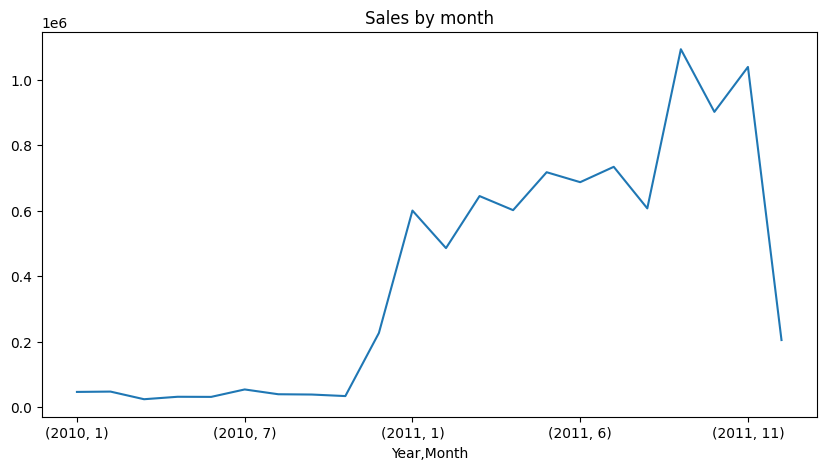

In [11]:
# take only positive Quantity, negative numbers might be refund or cancelled orders
df = df[(df.Quantity > 0)]
df_copy= df_sales = df
df_sales = pd.pivot_table(df_sales, index=["Year", "Month"], values=["Total_Order_Value"], aggfunc="sum")
df_sales['Total_Order_Value'].plot(kind='line', figsize=(10, 5), title='Sales by month')

### Top twenty products X axis = Product names, Y axis = Quantity

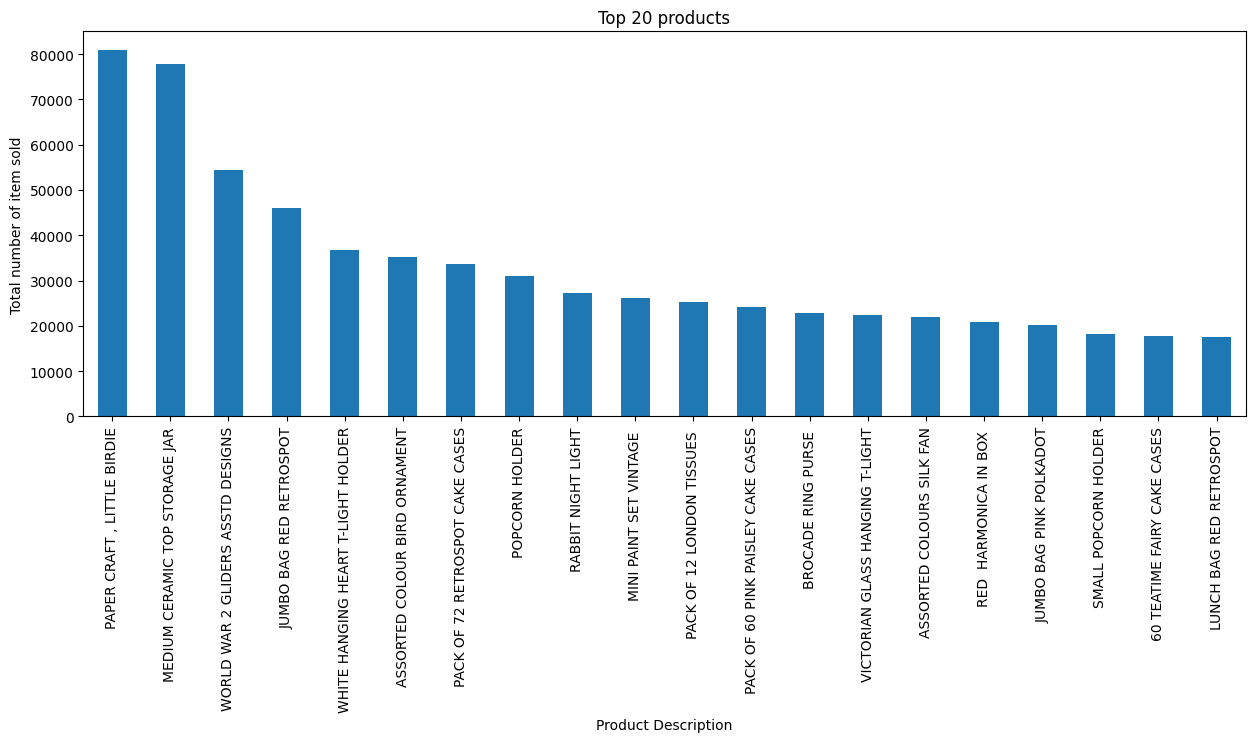

In [12]:
bottom_products = df.groupby('Description',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(20)
graph = bottom_products.plot(x="Description", y="Quantity", legend=False, kind='bar', figsize=(15,5))
plt.title('Top 20 products')
graph.set_ylabel('Total number of item sold')
graph.set_xlabel('Product Description')
plt.show()

### Least Popular Products: -10

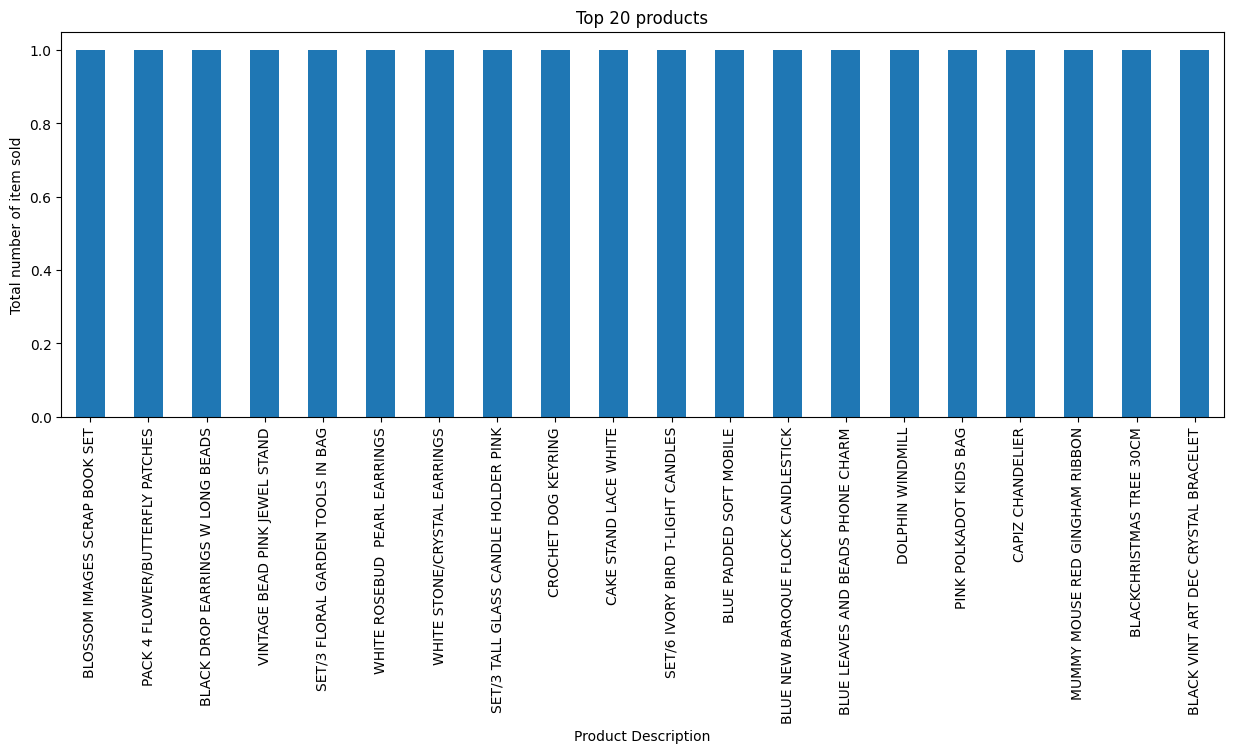

In [13]:
bottom_products = df.groupby('Description',as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=True).head(20)
graph = bottom_products.plot(x="Description", y="Quantity", legend=False, kind='bar', figsize=(15,5))
plt.title('Top 20 products')
graph.set_ylabel('Total number of item sold')
graph.set_xlabel('Product Description')
plt.show()

### Top products shorted by revenue

In [14]:
top_prod_by_rev = df[['Description', 'Total_Order_Value',]].groupby('Description').sum().sort_values('Total_Order_Value', ascending=False).head(8)
top_prod_by_rev.style.background_gradient()

,Total_Order_Value
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600000
REGENCY CAKESTAND 3 TIER,142264.750000
WHITE HANGING HEART T-LIGHT HOLDER,100392.100000
JUMBO BAG RED RETROSPOT,85040.540000
MEDIUM CERAMIC TOP STORAGE JAR,81416.730000
POSTAGE,77803.960000
PARTY BUNTING,68785.230000
ASSORTED COLOUR BIRD ORNAMENT,56413.030000


### Top 5 rich customer
#### we can get most or least data grouped by country, customer, revenue, sales by this approach

In [15]:
top_prod_by_rev = df[['CustomerID', 'Total_Order_Value',]].groupby('CustomerID').sum().sort_values('Total_Order_Value', ascending=False).head(5)
top_prod_by_rev.style.background_gradient(text_color_threshold=.5)

,Total_Order_Value
CustomerID,
14646,280206.020000
18102,259657.300000
17450,194390.790000
16446,168472.500000
14911,143711.170000


#### top sales in UK

In [16]:
top_country_Quantity = df[['Country', 'Total_Order_Value']].groupby('Country').sum().sort_values('Total_Order_Value', ascending=False).head(10)
top_country_Quantity

,Total_Order_Value
Country,
United Kingdom,7285024.644
Netherlands,285446.340
EIRE,265262.460
Germany,228678.400
France,208934.310
Australia,138453.810
Spain,61558.560
Switzerland,56443.950
Belgium,41196.340


#### least sales in Saudi Arabia

In [17]:
top_country_Quantity = df[['Country', 'Total_Order_Value']].groupby('Country').sum().sort_values('Total_Order_Value').head(10)
top_country_Quantity

,Total_Order_Value
Country,
Saudi Arabia,145.92
Bahrain,548.40
Czech Republic,826.74
RSA,1002.31
Brazil,1143.60
European Community,1300.25
Lithuania,1661.06
Lebanon,1693.88
United Arab Emirates,1902.28


#### Generating Heatmap

##### corr(method='kendall') commonly referred to as Kendall's coefficient is a statistic used to measure the ordinal association between two measured quantities.We can see this heatmap shows strong relation between Quantity and and Total Order Value, more sale more revenue

<Axes: >

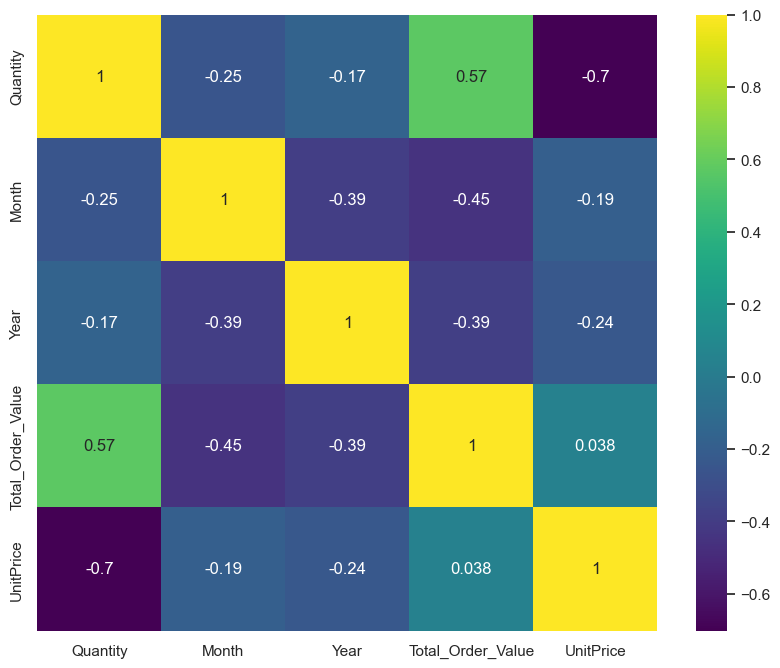

In [18]:
correlation = df[['Quantity', 'Month', 'Year', 'Total_Order_Value', 'UnitPrice']].corr(method='kendall')
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(correlation.corr(), annot=True, cmap='viridis')

In [19]:
# maximum unit price is 8142.75 minimum is 0 and average unit price is 3.12
df.UnitPrice.mean() #3.12
# so we can limi unit price maybe i will take 0 to 50
df = df[(df.UnitPrice > 0) & (df.UnitPrice < 50)]

#### Here we can see revenue got hiked 2011 > 2010 . Here we will predic purchase quantity of January 2012

In [20]:
data = df[['Year', 'Month', 'Quantity']]
# now we will find out total revenue in months by groupin Months, Year so we can predict revenue for upcoming months....
#data_y_m_r = data.groupby(['Month', 'Year']).sum()['Total_Order_Value'].reset_index()
data_y_m_r = data.groupby(['Year','Month']).sum()['Quantity'].reset_index()
#data_y_m_r = data_y_m_r.drop(index=12)
print(data_y_m_r)

    Year  Month  Quantity
0   2010      1     24112
1   2010      2     31075
2   2010      3     11798
3   2010      5     16241
4   2010      6     16113
5   2010      7     19394
6   2010      8     21494
7   2010      9     17381
8   2010     10     15925
9   2010     12    137467
10  2011      1    381086
11  2011      2    288933
12  2011      3    365241
13  2011      4    367838
14  2011      5    411244
15  2011      6    408675
16  2011      7    437715
17  2011      8    362042
18  2011      9    600943
19  2011     10    498159
20  2011     11    594545
21  2011     12    124051


#### Dividing data into test train

In [21]:
from sklearn.model_selection import train_test_split # to split data into train and test set
x = data_y_m_r[['Month','Year']]
y = data_y_m_r["Quantity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

## Linear Regression
#### I am using Linear Regression for predicting purchase amount in January 2012. I am using linear regression because it is easy to implement not recommended. For series forcasting Random Forest or SVM, GBM would be better choice. 

In [22]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, x, y):
        # Convert data to float64 
        x = np.asarray(x, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        x_with_bias = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        self.coefficients = np.linalg.inv(x_with_bias.T @ x_with_bias) @ x_with_bias.T @ y
    
    def predict(self, x):        
        x = np.asarray(x, dtype=np.float64)        
        x_with_bias = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        return x_with_bias @ self.coefficients

In [23]:
model = LinearRegression()# initializing the model class
model.fit(x_train, y_train)# we teach

In [24]:
# we are making a unit forecast for January 2012
X_pred = np.array([[1,2012]])
y_pred = model.predict(X_pred)
print(f'Unit sale in January, 2011 will be {y_pred.astype(int)}')

Unit sale in January, 2011 will be [768559]


## Evaluate model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score # to evaluate i'm using mean_squared_error, r2_score

# Predict on the test data
y_pred = model.predict(x_test)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3305693657.1215515
R-squared: 0.7663293885402696


#### In the first plot, points that lie closer to this line indicate better predictions.

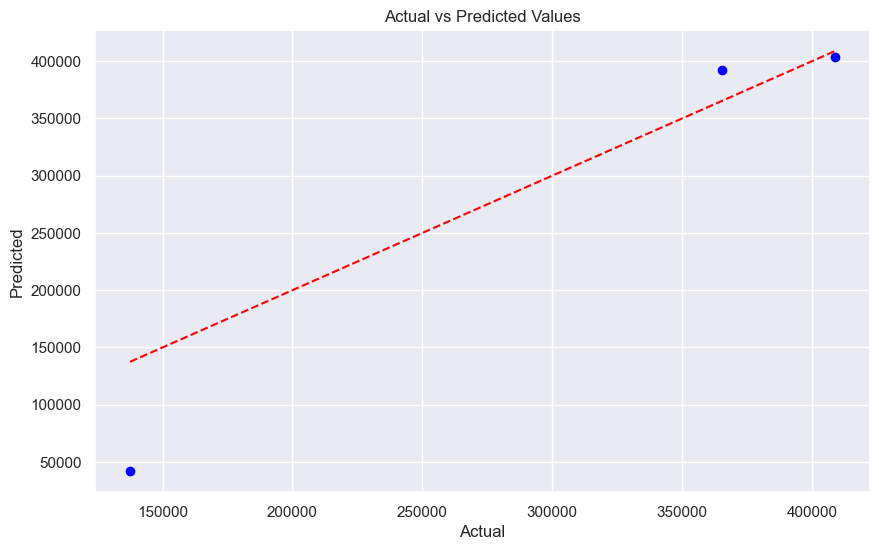

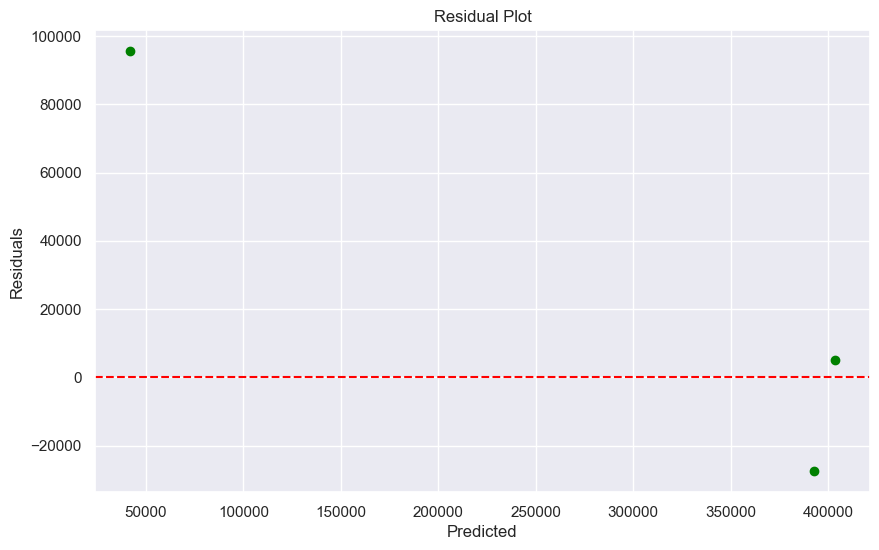

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

## Experimental - Don't run this script
#### we can split products into more dimension and predict things like which product will be sold more in January, 2012 etc..... but one-hot encoding makes Columns: 3886 and memory usage: 1.4+ GB which is too much. so can use clustering to cluster similar products and predict future sales. 

In [27]:
df_copy

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Total_Order_Value
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,1,2010,15.30
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1,2010,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,1,2010,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1,2010,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,1,2010,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,9,2011,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,9,2011,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,9,2011,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,9,2011,16.60


In [28]:
# data_products = pd.get_dummies(df_copy['Description'], prefix='product')
# data_products = pd.concat([df_copy, data_products], axis=1)
# data_products.drop('Description', axis=1, inplace=True)


In [30]:
# data_products.info()
# df_copy.to_csv('new_data.csv')